In [ ]:
#random_split(range(10), [3, 7], generator=torch.Generator().manual_seed(42))

In [ ]:
#https://www.kaggle.com/datasets/shrutisaxena/yoga-pose-image-classification-dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shrutisaxena/yoga-pose-image-classification-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 992M/0.98G [00:13<00:00, 87.6MB/s]
100% 0.98G/0.98G [00:13<00:00, 77.2MB/s]


In [ ]:
! unzip yoga-pose-image-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/bharadvajasana i/11-1.png  
  inflating: dataset/bharadvajasana i/14-0.png  
  inflating: dataset/bharadvajasana i/15-0.png  
  inflating: dataset/bharadvajasana i/18-0.png  
  inflating: dataset/bharadvajasana i/18-1.png  
  inflating: dataset/bharadvajasana i/19-0.png  
  inflating: dataset/bharadvajasana i/2-0.png  
  inflating: dataset/bharadvajasana i/20-0.png  
  inflating: dataset/bharadvajasana i/21-0.png  
  inflating: dataset/bharadvajasana i/22-0.png  
  inflating: dataset/bharadvajasana i/23-0.png  
  inflating: dataset/bharadvajasana i/24-0.png  
  inflating: dataset/bharadvajasana i/26-0.png  
  inflating: dataset/bharadvajasana i/28-0.png  
  inflating: dataset/bharadvajasana i/29-0.png  
  inflating: dataset/bharadvajasana i/3-0.png  
  inflating: dataset/bharadvajasana i/30-0.png  
  inflating: dataset/bharadvajasana i/31-0.png  
  inflating: dataset/bharadvajasana i/32-0.png  
  inflating: dataset

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
# loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.0.0+cu118
torchvision version: 0.15.1+cu118


In [ ]:
datapath="/content/dataset"
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225] )
    ])
transform = transforms.Compose(
    
    [transforms.Resize(256),
    transforms.CenterCrop(256),
      transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

dataset = torchvision.datasets.ImageFolder(root=datapath, transform=transform)
# import splitfolders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio("input_folder", output="output",
#     seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

# train_set, val_set,test_set = torch.utils.data.random_split(dataset, [0.7, 0.2,0.1])


# len(train_set[0]), len(test_set[0]), len(val_set[0])


In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio("dataset", output="splitdataset",
    seed=42, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values


Copying files: 5994 files [00:04, 1355.65 files/s]


In [ ]:
TRAIN_DATA_PATH="splitdataset/train"
TEST_DATA_PATH="splitdataset/test"
VAL_DATA_PATH="splitdataset/val"
BATCH_SIZE = 4
transform = transforms.Compose(
    [
        transforms.Resize(256),
    transforms.CenterCrop(256),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=transform)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) 


In [ ]:
# train_loader = torch.utils.data.DataLoader(dataset=TRAIN_DATA_PATH,
#                                            batch_size=batchsize,
#                                            shuffle=True)
# test_loader = torch.utils.data.DataLoader(dataset=TEST_DATA_PATH,
#                                           batch_size=batchsize,
#                                           shuffle=False)

In [ ]:
# See first training sample
image, label = train_data[0]
label


0

In [ ]:
image.shape

torch.Size([3, 256, 256])

In [ ]:
# How many samples are there? 
len(train_data)
#len(train_set[0][1]), len(test_set[0][1]), len(test_set[0][1])

4750

In [ ]:
import os
classes = [ f.path.replace("splitdataset/train/","") for f in os.scandir("splitdataset/train") if f.is_dir() ]

#classes =  [x[0] for x in os.walk("splitdataset/train")]
classes.sort()
for i in classes:
  print(i)

adho mukha svanasana
adho mukha vriksasana
agnistambhasana
ananda balasana
anantasana
anjaneyasana
ardha bhekasana
ardha chandrasana
ardha matsyendrasana
ardha pincha mayurasana
ardha uttanasana
ashtanga namaskara
astavakrasana
baddha konasana
bakasana
balasana
bhairavasana
bharadvajasana i
bhekasana
bhujangasana
bhujapidasana
bitilasana
camatkarasana
chakravakasana
chaturanga dandasana
dandasana
dhanurasana
durvasasana
dwi pada viparita dandasana
eka pada koundinyanasana i
eka pada koundinyanasana ii
eka pada rajakapotasana
eka pada rajakapotasana ii
ganda bherundasana
garbha pindasana
garudasana
gomukhasana
halasana
hanumanasana
janu sirsasana
kapotasana
krounchasana
kurmasana
lolasana
makara adho mukha svanasana
makarasana
malasana
marichyasana i
marichyasana iii
marjaryasana
matsyasana
mayurasana
natarajasana
padangusthasana
padmasana
parighasana
paripurna navasana
parivrtta janu sirsasana
parivrtta parsvakonasana
parivrtta trikonasana
parsva bakasana
parsvottanasana
pasasana
pasch

In [ ]:
len(classes), classes[3]

(107, 'ananda balasana')

<ipython-input-20-e47b7b460e1e>:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  plt.imshow(image.squeeze().T) # image shape is [1, 28, 28] (colour channels, height, width)


Image shape: torch.Size([3, 256, 256])


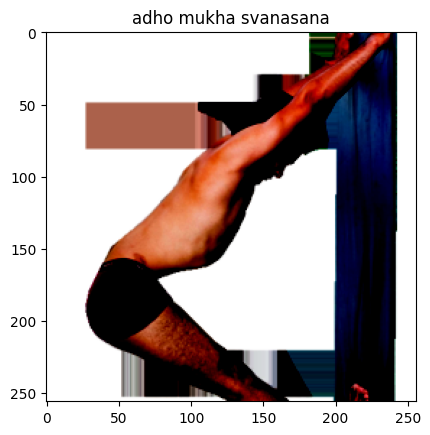

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze().T) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(classes[label]);

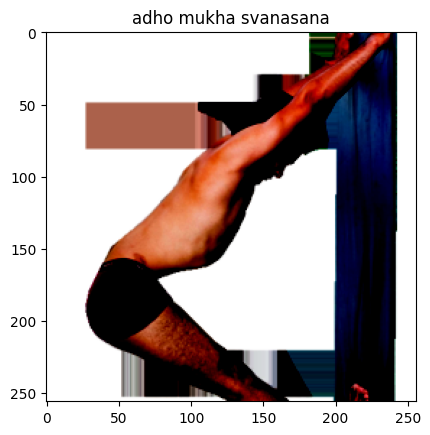

In [ ]:
plt.imshow(image.squeeze().T, cmap="gray")
plt.title(classes[label]);

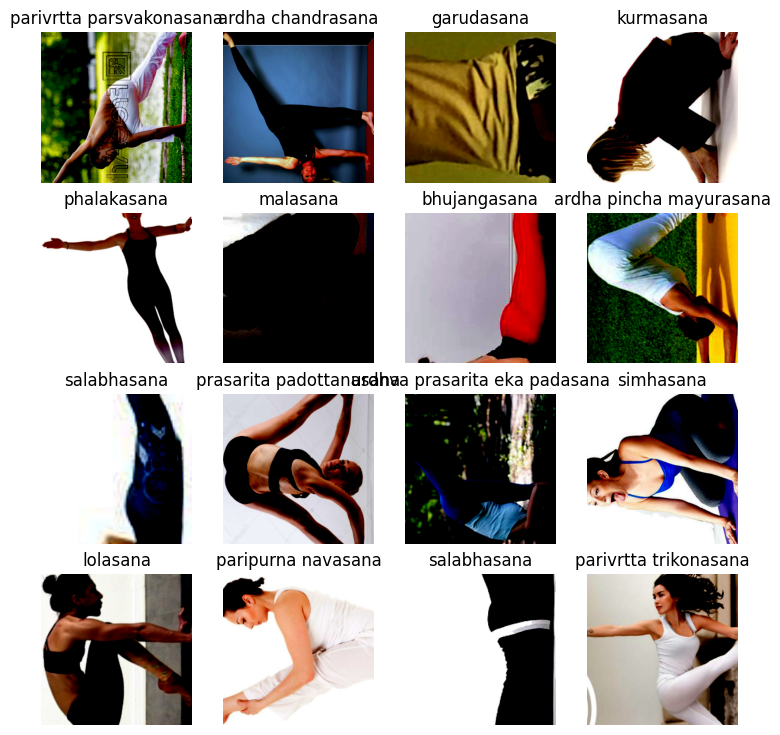

In [ ]:
# Plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9, 9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx= torch.randint(0,len(train_data),size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze().T,cmap="gray")
  plt.title(classes[label])
  plt.axis(False);


In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 4

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f26f319c9a0>, <torch.utils.data.dataloader.DataLoader object at 0x7f26f31912b0>)
Length of train dataloader: 1188 batches of 4
Length of test dataloader: 173 batches of 4


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([4, 3, 256, 256]), torch.Size([4]))

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc0= nn.Flatten(),
        self.fc1 = nn.Linear(59536, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 107)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Finished Training


In [ ]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
#imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  utthita trikonasana savasana chaturanga dandasana vasisthasana


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 12 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: adho mukha svanasana is 0.0 %
Accuracy for class: adho mukha vriksasana is 0.0 %
Accuracy for class: agnistambhasana is 0.0 %
Accuracy for class: ananda balasana is 0.0 %
Accuracy for class: anantasana is 40.0 %
Accuracy for class: anjaneyasana is 0.0 %
Accuracy for class: ardha bhekasana is 0.0 %
Accuracy for class: ardha chandrasana is 16.7 %
Accuracy for class: ardha matsyendrasana is 11.1 %
Accuracy for class: ardha pincha mayurasana is 0.0 %
Accuracy for class: ardha uttanasana is 37.5 %
Accuracy for class: ashtanga namaskara is 0.0 %
Accuracy for class: astavakrasana is 62.5 %
Accuracy for class: baddha konasana is 0.0 %
Accuracy for class: bakasana is 0.0 %
Accuracy for class: balasana is 0.0 %
Accuracy for class: bhairavasana is 0.0 %
Accuracy for class: bharadvajasana i is 0.0 %
Accuracy for class: bhekasana is 0.0 %
Accuracy for class: bhujangasana is 0.0 %
Accuracy for class: bhujapidasana is 0.0 %
Accuracy for class: bitilasana is 30.0 %
Accuracy for cla